# Predicción de Diabetes

Trabajo con base de datos de diabetes obtenida de kaggle.

Fuente de datos:https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?resource=download

## Empezamos limpiando nuestro Set de Datos

---



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
PATH = '/content/drive/MyDrive/laboratorios machine learning/proyecto/'

In [ ]:
#Leémos el Set de datos
#d = pd.read_csv(PATH + 'diabetes.csv')
df = pd.read_csv('diabetes.csv')

In [ ]:
#Checamos las distintas columnas de el data frame
df.columns
#Sustituimos por sus nombres en español
traduccion = {
    'Pregnancies': 'Embarazos',
    'Glucose': 'Glucosa',
    'BloodPressure': 'PresionSanguinea',
    'SkinThickness': 'GrosorPiel',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'FuncionPedigriDiabetes',
    'Age': 'Edad',
    'Outcome': 'Resultado'
}

# Renombramos las columnas en Español
df = df.rename(columns=traduccion)

In [ ]:
df

,Embarazos,Glucosa,PresionSanguinea,GrosorPiel,Insulina,IMC,FuncionPedigriDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Verificamos la cantidad de renglones y columnas
df.shape

(768, 9)

In [ ]:
#Verificamos la cantidad de ceros que hay en cada columna
ceros_por_columna = (df == 0).sum()
ceros_por_columna

Embarazos                 111
Glucosa                     5
PresionSanguinea           35
GrosorPiel                227
Insulina                  374
IMC                        11
FuncionPedigriDiabetes      0
Edad                        0
Resultado                 500
dtype: int64

En embarazos es normal que no hayan tenido uno, por lo que dejamos los ceros.
Los resultados es normal que haya ceros ya que indica la ausencia de diabetes.
En la Glucosa, Presion Sanguínea y el IMC tienen pocos datos faltantes, por lo que rellenaremos con alguna medida de tendencia central.

El grosor de piel tiene un faltante de el 29.55% de los datos.
La Insulina tiene un faltante del 48.69% de los datos.
Por lo que obtaremos por eliminar estas columnas, ya que al rellenarlas podríamos sesgar el resultado de la predición

In [ ]:
#Eliminamos las columnas del Set de datos
df = df.drop(['GrosorPiel','Insulina'],axis=1)

In [ ]:
#Verificamos que ya se hayan eliminado
df

,Embarazos,Glucosa,PresionSanguinea,IMC,FuncionPedigriDiabetes,Edad,Resultado
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [ ]:
# Volvemos a verificar datos faltantes
ceros_por_columna2 = (df == 0).sum()
ceros_por_columna2

Embarazos                 111
Glucosa                     5
PresionSanguinea           35
IMC                        11
FuncionPedigriDiabetes      0
Edad                        0
Resultado                 500
dtype: int64

En las columnas de Glucosa, Presion Sanguínea y el IMC  queremos llenar los datos faltantes para hacer un mejores predicciones, queremos elegir entre la media y la mediana.
Para elegir queremos ver si hay valores atípicos o no, por lo que graficaremos una gráfica de caja y bigotes.

In [ ]:
columnas_a_rellenar = df[['Glucosa','PresionSanguinea','IMC']]
columnas_a_rellenar

,Glucosa,PresionSanguinea,IMC
0,148,72,33.6
1,85,66,26.6
2,183,64,23.3
3,89,66,28.1
4,137,40,43.1
...,...,...,...
763,101,76,32.9
764,122,70,36.8
765,121,72,26.2
766,126,60,30.1


# Rellenar con la media para cada columna, glucosa, Presión sanguínea e IMC


In [ ]:
df['Glucosa'].mean()

120.89453125

In [ ]:
tienen_diabetes = df[df['Resultado']==1]
no_tienen =df[df['Resultado']==0]
tienen_diabetes['Glucosa'].mean()

141.25746268656715

In [ ]:
df[(df['Resultado']==1) & df['Glucosa']!=0]['Glucosa'].mean()


143.10852713178295

In [ ]:
df[df['IMC']==0]

,Embarazos,Glucosa,PresionSanguinea,IMC,FuncionPedigriDiabetes,Edad,Resultado
9,8,125,96,0.0,0.232,54,1
49,7,105,0,0.0,0.305,24,0
60,2,84,0,0.0,0.304,21,0
81,2,74,0,0.0,0.102,22,0
145,0,102,75,0.0,0.572,21,0
371,0,118,64,0.0,1.731,21,0
426,0,94,0,0.0,0.256,25,0
494,3,80,0,0.0,0.174,22,0
522,6,114,0,0.0,0.189,26,0
684,5,136,82,0.0,0.640,69,0


In [ ]:
def rellenar(df, columna):
  #ESTRATIFICAMOS
  media_ConDiabetes = df[(df['Resultado']==1) & df[columna]!=0][columna].mean()
  media_sinDiabetes = df[(df['Resultado']==0) & df[columna]!=0][columna].mean()
  df.loc[(df['Resultado'] == 1) & (df[columna] == 0), columna] = media_ConDiabetes
  df.loc[(df['Resultado'] == 0) & (df[columna] == 0), columna] = media_sinDiabetes



In [ ]:
rellenar(df, 'Glucosa')
# rellenar(df, 'PresionSanguinea')
# rellenar(df, 'IMC')

df[df == 0].sum()


Embarazos                 0.0
Glucosa                   0.0
PresionSanguinea          0.0
IMC                       0.0
FuncionPedigriDiabetes    0.0
Edad                      0.0
Resultado                 0.0
dtype: float64

In [ ]:
df['PresionSanguinea'] = df['PresionSanguinea'].fillna(df['PresionSanguinea'].median())
df['IMC'] = df['IMC'].fillna(df['IMC'].median())

Empezamos a aplicar los modelo

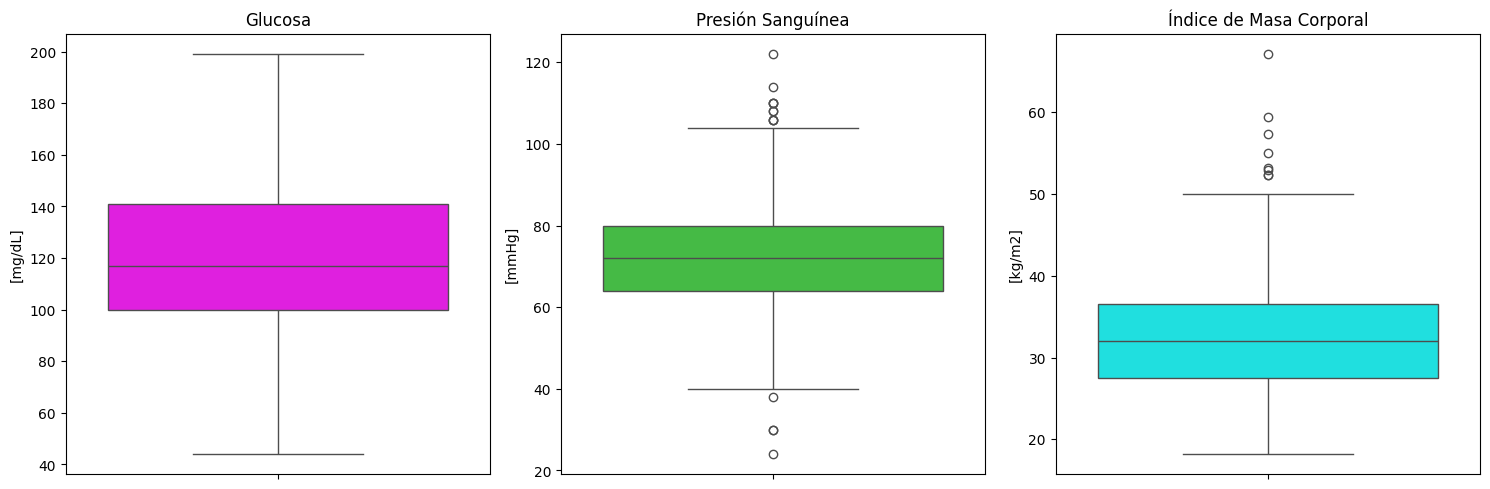

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponemos que 'df' es tu DataFrame

# Configuramos el tamaño general de la figura
plt.figure(figsize=(15, 5))

# Gráfica para 'Glucosa'
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
sns.boxplot(data=df, y='Glucosa', color='magenta')
plt.title('Glucosa')  # Título simplificado
plt.ylabel('[mg/dL]')  # Unidad de medida en el eje y

# Gráfica para 'Presión Sanguínea'
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
sns.boxplot(data=df, y='PresionSanguinea', color='limegreen')
plt.title('Presión Sanguínea')  # Título simplificado
plt.ylabel('[mmHg]')  # Unidad de medida en el eje y

# Gráfica para 'IMC'
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
sns.boxplot(data=df, y='IMC', color='cyan')
plt.title('Índice de Masa Corporal')  # Título simplificado
plt.ylabel('[kg/m2]')  # Unidad de medida en el eje y

plt.tight_layout()  # Ajusta automáticamente los subplots para que no se solapen
plt.show()  # Muestra la figura completa


Interpretación de los Boxplots:
Glucosa:

La mediana parece estar alrededor de 100.
Los bigotes se extienden desde aproximadamente 60 hasta 160, indicando el rango típico.
Hay algunos valores atípicos por encima de 160.

Se puede observar que los únicos datos atípicos son los de la gráfica de la Glucosa con valor igual a 0.

Presión Sanguínea:

La mediana está cerca de 70.
El rango típico (los bigotes) va desde cerca de 50 hasta 90.

Sepuede observar que hay más datos atípicos que los valores igual a 0 y que  se muestran más en losn  valores de 100 a 120 aprox
Hay varios valores atípicos tanto por debajo de 50 como por encima de 90.
IMC:

La mediana está cerca de 30.
Los bigotes se extienden desde alrededor de 20 hasta 50.
Existen múltiples valores atípicos por encima de 50.

# Aplicamos los modelos aprendidos

Aplicamos el modelo de Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,Embarazos,Glucosa,PresionSanguinea,IMC,FuncionPedigriDiabetes,Edad,Resultado
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.iloc[:,:-1], #matriz
                                                df.iloc[:,-1], #etiquetas
                                                test_size=.3, #porcenraje del test
                                                shuffle=True,#para que no tome en cuenta los indices
                                                random_state = 42


                                                )

In [ ]:
#usamos gaussian porque son datos numericos
clasificador = GaussianNB()
clasificador.fit(Xtrain, Ytrain)

GaussianNB()

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)


(537, 6)
(537,)
(231, 6)
(231,)


In [ ]:
ypred_NV = clasificador.predict(Xtest)


In [ ]:
accuracy_score(Ytest, ypred_NV)

0.7272727272727273

In [ ]:
as_NV = accuracy_score(Ytest, ypred_NV)
p_NV = precision_score(Ytest, ypred_NV)
r_NV = recall_score(Ytest, ypred_NV)
f1_NV = f1_score(Ytest, ypred_NV)

print('accuracy', as_NV)
print('precision',p_NV)
print('recall',r_NV)
print('f1',f1_NV)

accuracy 0.7272727272727273
precision 0.6
recall 0.6375
f1 0.6181818181818182


k-Vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [ ]:
ypred_knn= knn.predict(Xtest)


con k = 5

accuracy 0.70625

precision 0.6388888888888888

recall 0.40350877192982454

f1 0.49462365591397844

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain,Ytrain)
ypred_knn= knn.predict(Xtest)


as_knn = accuracy_score(Ytest, ypred_knn)
p_knn = precision_score(Ytest, ypred_knn)
r_knn = recall_score(Ytest, ypred_knn)
f1_knn = f1_score(Ytest, ypred_knn)

print('accuracy', as_knn)
print('precision',p_knn)
print('recall',r_knn)
print('f1',f1_knn)

accuracy 0.7445887445887446
precision 0.6329113924050633
recall 0.625
f1 0.6289308176100629


Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:

decision_tree.fit(Xtrain,Ytrain)
ypred_dt= decision_tree.predict(Xtest)


In [ ]:
as_dt = accuracy_score(Ytest, ypred_dt)
p_dt = precision_score(Ytest, ypred_dt)
r_dt = recall_score(Ytest, ypred_dt)
f1_dt = f1_score(Ytest, ypred_dt)

print('accuracy', as_dt)
print('precision',p_dt)
print('recall',r_dt)
print('f1',f1_dt)

accuracy 0.6926406926406926
precision 0.5454545454545454
recall 0.675
f1 0.6033519553072625


Regresión logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(Xtrain,Ytrain)

LogisticRegression()

In [ ]:
ypred_lr= logistic_model.predict(Xtest)

In [ ]:
as_lr = accuracy_score(Ytest, ypred_lr)
p_lr = precision_score(Ytest, ypred_lr)
r_lr = recall_score(Ytest, ypred_lr)
f1_lr = f1_score(Ytest, ypred_lr)

print('accuracy', as_lr)
print('precision',p_lr)
print('recall',r_lr)
print('f1',f1_lr)

accuracy 0.7445887445887446
precision 0.6438356164383562
recall 0.5875
f1 0.6143790849673203


máquinas de soporte vectorial

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf1 = SVC(kernel = "linear")
clf1.fit(Xtrain,Ytrain)

SVC(kernel='linear')

In [ ]:
accuracy_score(clf1.predict(Xtest) , Ytest)

0.7489177489177489

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
model1 = SVC(C=1,decision_function_shape='ovr')
model1.fit(Xtrain, Ytrain)
pred1= model1.predict(Xtest)

as_mv = accuracy_score(Ytest,pred1)
p_mv = precision_score(Ytest, ypred_lr)
r_mv = recall_score(Ytest, ypred_lr)
f1_mv = f1_score(Ytest, pred1,average='weighted')

print('accuracy', as_mv)
print('precision',p_mv)
print('recall',r_mv)
print('f1',f1_mv)

accuracy 0.7532467532467533
precision 0.6438356164383562
recall 0.5875
f1 0.7451545319883878


In [ ]:
model1 = SVC(C=0.1,decision_function_shape='ovr')
model1.fit(Xtrain, Ytrain)
pred1= model1.predict(Xtest)

as_mv = accuracy_score(Ytest,pred1)
p_mv = precision_score(Ytest, ypred_lr)
r_mv = recall_score(Ytest, ypred_lr)
f1_mv = f1_score(Ytest, pred1,average='weighted')

print('accuracy', as_mv)
print('precision',p_mv)
print('recall',r_mv)
print('f1',f1_mv)

accuracy 0.7489177489177489
precision 0.6438356164383562
recall 0.5875
f1 0.7345104537496238


tabla de comparación entre los modelos

In [ ]:
datos = [
    {'Modelo': 'Naive Bayes(Gaussian)', 'Accuracy': as_NV , 'Precision': p_NV, 'Recall': r_NV, 'f1': f1_NV},
    {'Modelo': 'KNN', 'Accuracy': as_knn , 'Precision': p_knn, 'Recall': r_knn, 'f1': f1_knn},
    {'Modelo': 'Decision Tree', 'Accuracy': as_dt , 'Precision': p_dt, 'Recall': r_dt, 'f1': f1_dt},
    {'Modelo': 'Logistic Regression', 'Accuracy': as_lr , 'Precision': p_lr, 'Recall': r_lr, 'f1': f1_lr},
    {'Modelo': 'SVM', 'Accuracy': as_mv , 'Precision': p_mv, 'Recall': r_mv, 'f1': f1_mv},

]

In [ ]:
modelos = pd.DataFrame(datos)
modelos

,Modelo,Accuracy,Precision,Recall,f1
0,Naive Bayes(Gaussian),0.727273,0.600000,0.6375,0.618182
1,KNN,0.744589,0.632911,0.6250,0.628931
2,Decision Tree,0.692641,0.545455,0.6750,0.603352
3,Logistic Regression,0.744589,0.643836,0.5875,0.614379
4,SVM,0.748918,0.643836,0.5875,0.734510


vamos a probar los modelos cambiando las variables a categorias

In [ ]:
#glucosa

bins= [0, 70, 140, float('inf')]
labels= ['Baja', 'Media', 'Alta']
#Categorizar los niveles de glucosa
df['Glucosa'] = pd.cut(df['Glucosa'], bins=bins, labels=labels, right=False)
#Imprimimos el df para verificar


In [ ]:
# edad

def categorizar_edad(edad):
     if 21 <= edad <= 35:
         return 'Jóvenes adultos'
     elif 36 <= edad <= 50:
         return 'Adultos de mediana edad'
     elif 51 <= edad <= 65:
         return 'Adultos mayores'
     elif edad >= 66:
         return 'Ancianos'

df['Edad'] = df['Edad'].apply(categorizar_edad)


In [ ]:
# presion
def categorizar_presion(presion):
    if presion < 90:
         return 'Baja'
    elif 90 <= presion <= 120:
         return 'Normal'
    elif 121 <= presion <= 140:
         return 'Elevada'
    elif presion > 140:
         return 'Alta'

df['Presion'] = df['PresionSanguinea'].apply(categorizar_edad)

In [ ]:
#imc

def categorizar_imc(imc):
     if imc < 18.5:
         return 'Bajo peso'
     elif 18.5 <= imc <= 24.9:
         return 'Normal'
     elif 25 <= imc <= 29.9:
         return 'Sobrepeso'
     else:
         return 'Obesidad'


df['IMC'] = df['IMC'].apply(categorizar_imc)

In [ ]:
#pedigri

def categorizar_pedigri(dpf):
     if dpf < 0.5:
         return 'Bajo'
     elif 0.5 <= dpf < 1.0:
         return 'Moderado'
     else:
         return 'Alto'

df['FuncionPedigriDiabetes'] = df['FuncionPedigriDiabetes'].apply(categorizar_pedigri)

In [ ]:
df

,Embarazos,Glucosa,PresionSanguinea,IMC,FuncionPedigriDiabetes,Edad,Resultado,Presion
0,6,Alta,72.0,Obesidad,Moderado,Adultos de mediana edad,1,Ancianos
1,1,Media,66.0,Sobrepeso,Bajo,Jóvenes adultos,0,Ancianos
2,8,Alta,64.0,Normal,Moderado,Jóvenes adultos,1,Adultos mayores
3,1,Media,66.0,Sobrepeso,Bajo,Jóvenes adultos,0,Ancianos
4,0,Media,40.0,Obesidad,Alto,Jóvenes adultos,1,Adultos de mediana edad
...,...,...,...,...,...,...,...,...
763,10,Media,76.0,Obesidad,Bajo,Adultos mayores,0,Ancianos
764,2,Media,70.0,Obesidad,Bajo,Jóvenes adultos,0,Ancianos
765,5,Media,72.0,Sobrepeso,Bajo,Jóvenes adultos,0,Ancianos
766,1,Media,60.0,Obesidad,Bajo,Adultos de mediana edad,1,Adultos mayores


In [ ]:
df_new = df_new.apply(LabelEncoder().fit_transform)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df_new.iloc[:,:-1],
                                                df_new.iloc[:,-1],
                                                test_size=.3,
                                                random_state = 42,
                                                shuffle=True

)

In [ ]:
from sklearn.naive_bayes import CategoricalNB

naive bayes

In [ ]:
clasificadorCategorico = CategoricalNB()
clasificadorCategorico.fit(xtrain,ytrain)
ypred= clasificadorCategorico.predict(xtest)


as_NV = accuracy_score(ytest, ypred)
p_NV = precision_score(ytest, ypred, average='weighted')
r_NV = recall_score(ytest, ypred, average='weighted')
f1_NV = f1_score(ytest, ypred, average='weighted')

knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred_knn= knn.predict(xtest)

as_knn = accuracy_score(ytest, ypred_knn)
p_knn = precision_score(ytest, ypred_knn,average='weighted')
r_knn = recall_score(ytest, ypred_knn, average='weighted')
f1_knn = f1_score(ytest, ypred_knn,average='weighted')

decision tree

In [ ]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain,ytrain)
ypred_dt= decision_tree.predict(xtest)

as_dt = accuracy_score(ytest, ypred_dt)
p_dt = precision_score(ytest, ypred_dt,average='weighted')
r_dt = recall_score(ytest, ypred_dt,average='weighted')
f1_dt = f1_score(ytest, ypred_dt,average='weighted')

logistic regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain,ytrain)
ypred_lr= logistic_model.predict(xtest)


as_lr = accuracy_score(ytest, ypred_lr)
p_lr = precision_score(ytest, ypred_lr,average='weighted')
r_lr = recall_score(ytest, ypred_lr,average='weighted')
f1_lr = f1_score(ytest, ypred_lr,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svc

In [ ]:
model1 = SVC(C=0.1,decision_function_shape='ovr')
model1.fit(xtrain, ytrain)
pred1= model1.predict(xtest)

as_mv = accuracy_score(ytest,pred1)
p_mv = precision_score(ytest, ypred_lr,average='weighted')
r_mv = recall_score(ytest, ypred_lr,average='weighted')
f1_mv = f1_score(ytest, pred1,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
datos2 = [
    {'Modelo': 'Naive Bayes(Gaussian)', 'Accuracy': as_NV , 'Precision': p_NV, 'Recall': r_NV, 'f1': f1_NV},
    {'Modelo': 'KNN', 'Accuracy': as_knn , 'Precision': p_knn, 'Recall': r_knn, 'f1': f1_knn},
    {'Modelo': 'Decision Tree', 'Accuracy': as_dt , 'Precision': p_dt, 'Recall': r_dt, 'f1': f1_dt},
    {'Modelo': 'Logistic Regression', 'Accuracy': as_lr , 'Precision': p_lr, 'Recall': r_lr, 'f1': f1_lr},
    {'Modelo': 'SVM', 'Accuracy': as_mv , 'Precision': p_mv, 'Recall': r_mv, 'f1': f1_mv},

]

In [ ]:
modelo2 = pd.DataFrame(datos2)
modelo2

,Modelo,Accuracy,Precision,Recall,f1
0,Naive Bayes(Gaussian),0.606061,0.545814,0.606061,0.513188
1,KNN,0.619048,0.576368,0.619048,0.563178
2,Decision Tree,0.575758,0.539594,0.575758,0.547114
3,Logistic Regression,0.601732,0.494615,0.601732,0.477657
4,SVM,0.606061,0.494615,0.601732,0.457404


In [ ]:
modelos

,Modelo,Accuracy,Precision,Recall,f1
0,Naive Bayes(Gaussian),0.727273,0.600000,0.6375,0.618182
1,KNN,0.744589,0.632911,0.6250,0.628931
2,Decision Tree,0.692641,0.545455,0.6750,0.603352
3,Logistic Regression,0.744589,0.643836,0.5875,0.614379
4,SVM,0.748918,0.643836,0.5875,0.734510


promedio de las metricas del primero modelo

In [ ]:
modelos['Promedio'] = modelos[['Accuracy', 'Precision', 'Recall', 'f1']].mean(axis=1)
modelos

,Modelo,Accuracy,Precision,Recall,f1,Promedio
0,Naive Bayes(Gaussian),0.727273,0.600000,0.6375,0.618182,0.645739
1,KNN,0.744589,0.632911,0.6250,0.628931,0.657858
2,Decision Tree,0.692641,0.545455,0.6750,0.603352,0.629112
3,Logistic Regression,0.744589,0.643836,0.5875,0.614379,0.647576
4,SVM,0.748918,0.643836,0.5875,0.734510,0.678691


Hay una diferencia entre las métricas cuando categorizamos los datos, por lo tanto elegimos la opción de  no categorizarlos porque presenta mejores resultados en las métricas

La F_beta que se decidió utilizar para determinar el mejor modelo fue la sensibilidad, ya que los datos que se tratan son de salud, y es preferible dar un falso positivo, por lo tanto, el modelo ganador es : Decision Tree


Para el ensamble se usaran los modelos de regresión log